In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from isc301.config import housing_prices_raw_path
from isc301.functions import data_preprocessing, model_fit_1, model_fit_2, model_predict
from sklearn.metrics import r2_score



In [2]:
df = pd.read_csv(housing_prices_raw_path)
#df.head()
# sort by n_garage_voitures ascending
df.sort_values(by=['n_garage_voitures'], ascending=False).head()

,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
1362,9200,9,5500,10,5,4,4,18,2,8,2009,950000,2 pans,individuelle,excellente,1586.297674
1190,1622,4,1249,4,4,0,1,7,1,3,2007,168000,2 pans,individuelle reconvertie,moyenne,10.537551
420,1344,7,1344,5,4,0,0,8,2,2,2008,206300,2 pans,duplex,moyenne,206.074792
747,2640,7,1240,7,4,1,1,8,1,4,2009,265979,mansarde,individuelle,bonne,326.261707
1363,9000,10,5200,10,4,3,3,16,2,7,2008,850000,4 pans,individuelle,excellente,1119.747955


# Find correlations 

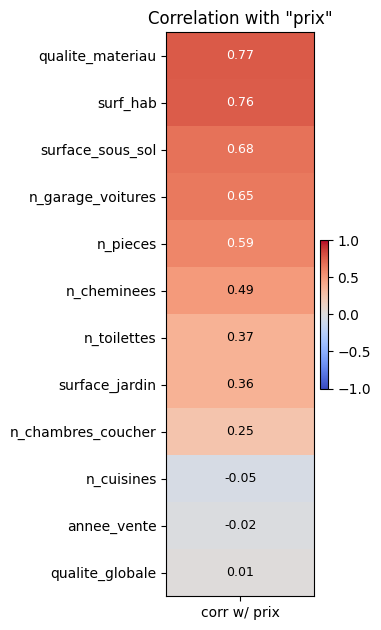

In [3]:
# keep only numeric columns and ensure 'prix' has no NaNs
num = df.select_dtypes(include='number').dropna(subset=['prix'])

# correlation of every numeric feature with price
corr_with_price = (
    num.corr(numeric_only=True)['prix']     # correlations against 'prix'
       .drop('prix')                        # drop self-correlation
       .sort_values(key=lambda s: s.abs(),  # sort by absolute strength
                    ascending=False)
)

# draw a 1-column heatmap 
values = corr_with_price.values.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(4, 0.45*len(corr_with_price)+1))
im = ax.imshow(values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

ax.set_yticks(range(len(corr_with_price)))
ax.set_yticklabels(corr_with_price.index)
ax.set_xticks([0])
ax.set_xticklabels(['corr w/ prix'])

# annotate each cell with the numeric value
for i, v in enumerate(corr_with_price.values):
    ax.text(0, i, f'{v:.2f}', ha='center', va='center',
            color=('white' if abs(v) > 0.5 else 'black'), fontsize=9)

plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Correlation with "prix"')
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Price vs. qualité matériau'}, xlabel='qualite_materiau', ylabel='prix'>

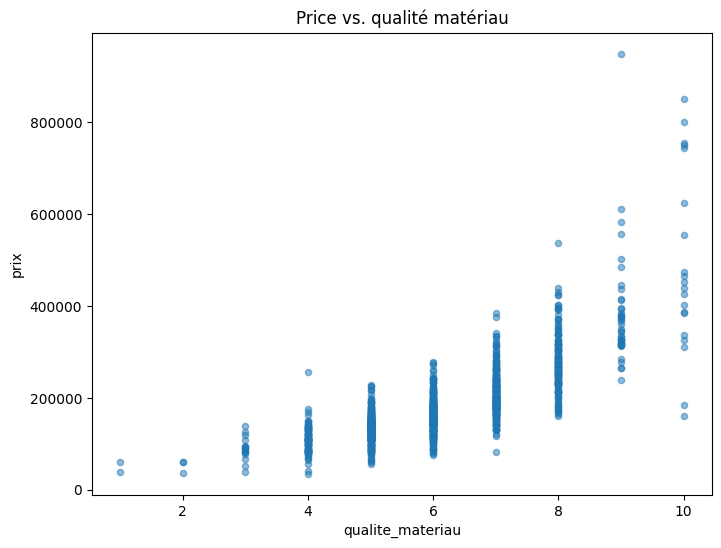

In [4]:
# correlation of price and qualité matériau
df.plot(
    kind='scatter',
    y='prix',
    x='qualite_materiau',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. qualité matériau'
)

<Axes: title={'center': 'Price vs. Surface Area'}, xlabel='surf_hab', ylabel='prix'>

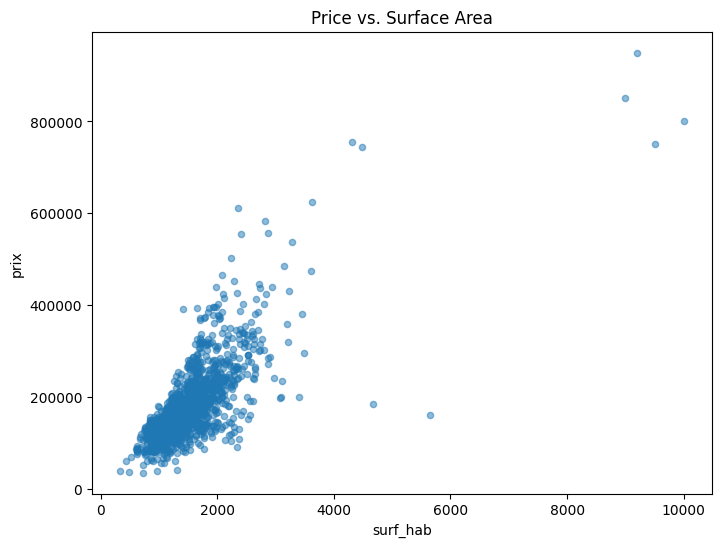

In [5]:
# correlation of price and surface habitable
df.plot(
    kind='scatter',
    y='prix',
    x='surf_hab',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. Surface Area'
)

<Axes: title={'center': 'Price vs. Surface sous sol'}, xlabel='surface_sous_sol', ylabel='prix'>

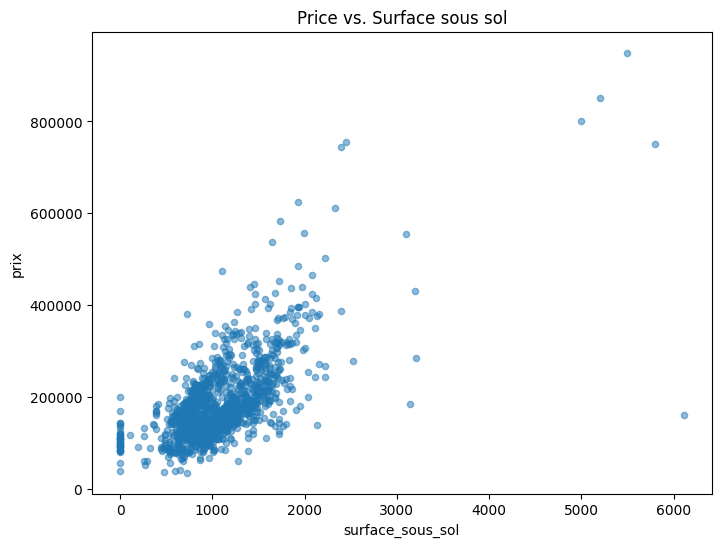

In [6]:
# correlation of price and surface sous sol
df.plot(
    kind='scatter',
    y='prix',
    x='surface_sous_sol',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. Surface sous sol'
)

<Axes: title={'center': 'Price vs. Surface sous sol'}, xlabel='surface_jardin', ylabel='prix'>

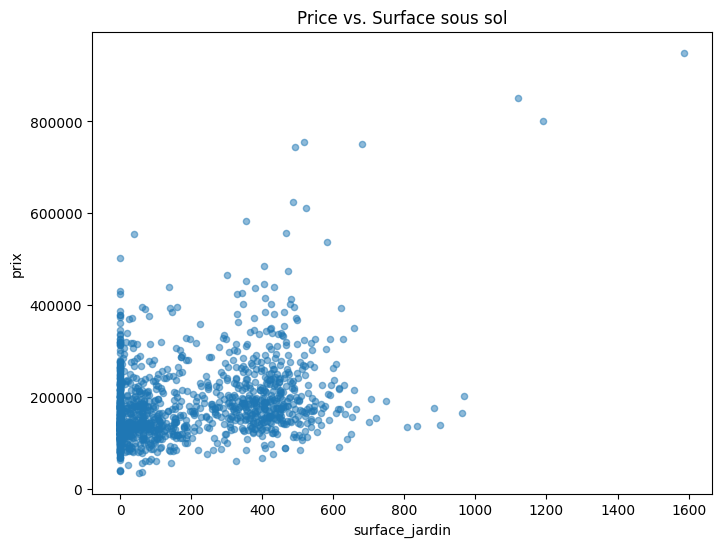

In [7]:
# correlation of price and surface jardin
df.plot(
    kind='scatter',
    y='prix',
    x='surface_jardin',
    alpha=0.5,
    figsize=(8,6),
    title='Price vs. Surface sous sol'
)

## Outliers

<Axes: >

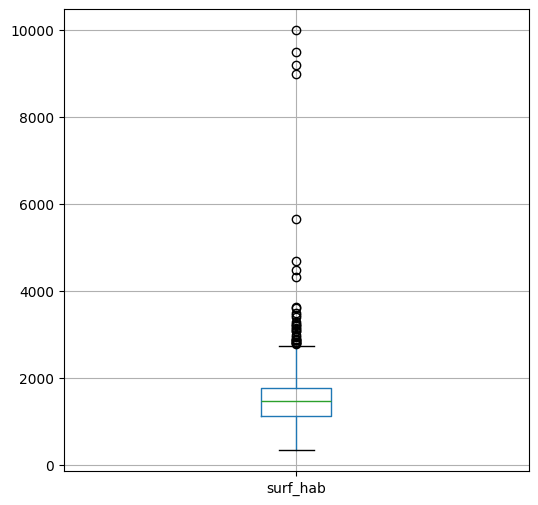

In [8]:
# show outliers for surface habitable
df.boxplot(column='surf_hab', figsize=(6,6))

In [ ]:
# get outliers for surf_hab
q1 = df['surf_hab'].quantile(0.25)
q3 = df['surf_hab'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# get outliers 
outliers = df[(df['surf_hab'] < lower_bound) | 
              (df['surf_hab'] > upper_bound)]

outliers.sort_values('surf_hab', ascending = False).head()


,surf_hab,qualite_materiau,surface_sous_sol,qualite_globale,n_garage_voitures,n_toilettes,n_cheminees,n_pieces,n_cuisines,n_chambres_coucher,annee_vente,prix,type_toit,type_batiment,qualite_cuisine,surface_jardin
1360,10000,10,5000,10,4,3,3,15,2,6,2008,800000,2 pans,individuelle,excellente,1190.954402
1361,9500,10,5800,9,3,2,2,12,1,5,2007,750000,4 pans,individuelle,excellente,680.370176
1362,9200,9,5500,10,5,4,4,18,2,8,2009,950000,2 pans,individuelle,excellente,1586.297674
1363,9000,10,5200,10,4,3,3,16,2,7,2008,850000,4 pans,individuelle,excellente,1119.747955
1298,5642,10,6110,5,2,1,3,12,1,3,2008,160000,4 pans,individuelle,excellente,428.339231
523,4676,10,3138,5,3,1,1,11,1,3,2007,184750,4 pans,individuelle,excellente,458.459867
1182,4476,10,2396,5,3,1,2,10,1,4,2007,745000,4 pans,individuelle,excellente,493.231661
691,4316,10,2444,6,3,1,2,10,1,4,2007,755000,2 pans,individuelle,excellente,517.332980
1169,3627,10,1930,5,3,1,1,10,1,4,2006,625000,4 pans,individuelle,bonne,486.541556
185,3608,10,1107,9,3,1,2,12,1,4,2006,475000,2 pans,individuelle,excellente,472.600049


In [10]:
# remove outliers 
df_cleaned = df[(df['surf_hab'] >= lower_bound) & 
                (df['surf_hab'] <= upper_bound)]

<Axes: >

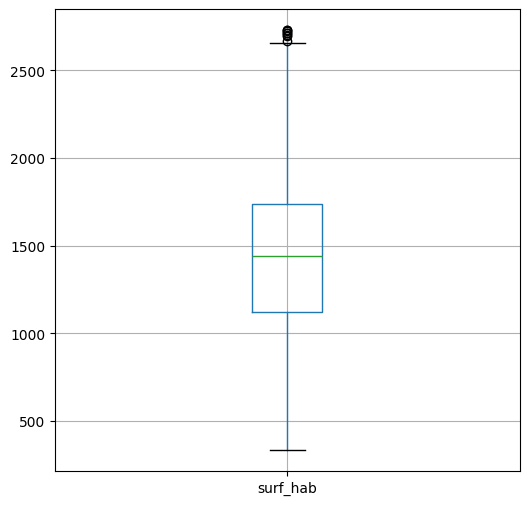

In [11]:
df_cleaned.boxplot(column='surf_hab', figsize=(6,6))

<Axes: >

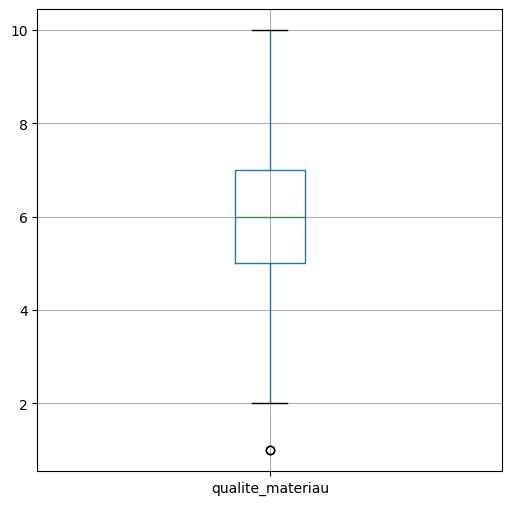

In [12]:
df.boxplot(column='qualite_materiau', figsize=(6,6))

<Axes: >

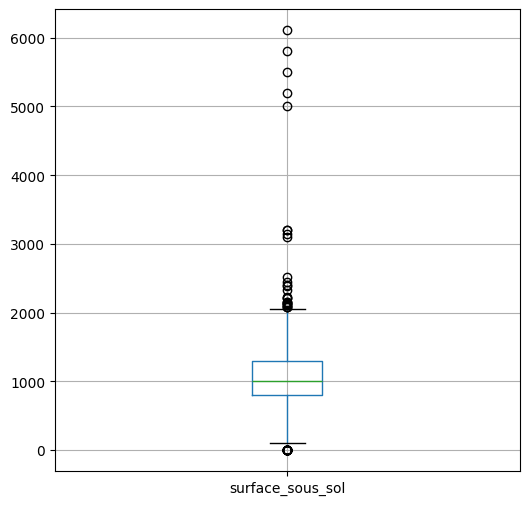

In [13]:
df.boxplot(column='surface_sous_sol', figsize=(6,6))

<Axes: >

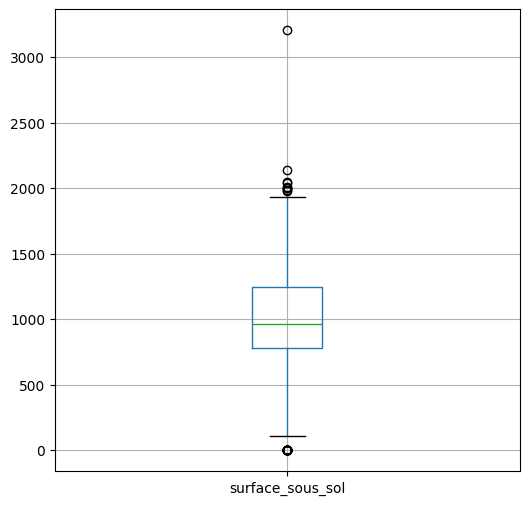

In [14]:
# get outliers for surface_sous_sol
q1 = df['surface_sous_sol'].quantile(0.25)
q3 = df['surface_sous_sol'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# get outliers 
outliers = df[(df['surface_sous_sol'] < lower_bound) | 
              (df['surface_sous_sol'] > upper_bound)]

# remove outliers 
df_cleaned = df[(df['surf_hab'] >= lower_bound) & 
                (df['surf_hab'] <= upper_bound)]

df_cleaned.boxplot(column='surface_sous_sol', figsize=(6,6))

<Axes: >

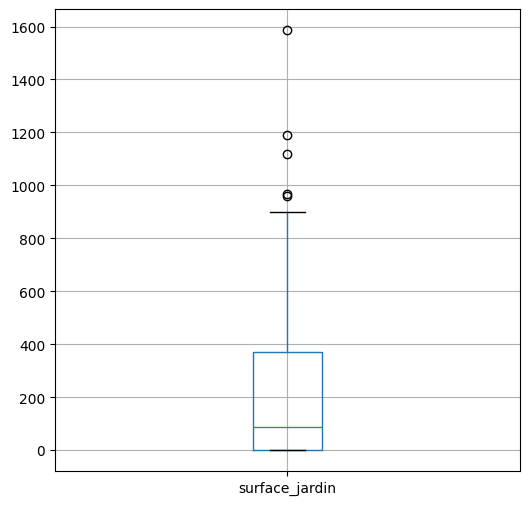

In [15]:
df.boxplot(column='surface_jardin', figsize=(6,6))  

# Model

In [16]:
X, Y, X_test, Y_test, X_val, Y_val, scaler = data_preprocessing(df)
#print(X)
#print(Y)


In [17]:
# model 
model, poly = model_fit_2(X, Y)
#model = model_fit_1(X, Y)


In [18]:
# predict model
y_pred = model_predict(model, poly, X)
y_pred_val = model_predict(model, poly, X_val)
#y_pred = model_predict(model, 2, X)

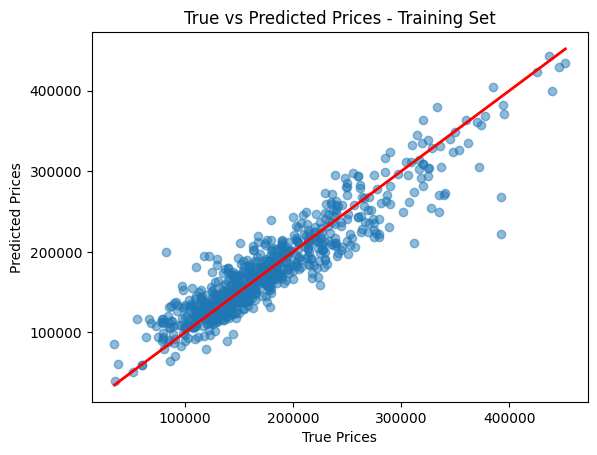

In [19]:
plt.scatter(Y, y_pred, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Training Set")
plt.show()

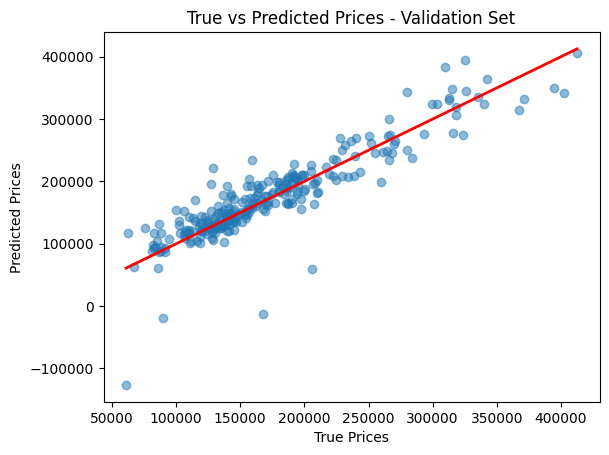

In [20]:
plt.scatter(Y_val, y_pred_val, alpha=0.5)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], color='red', linewidth=2)
plt.title("True vs Predicted Prices - Validation Set")
plt.show()

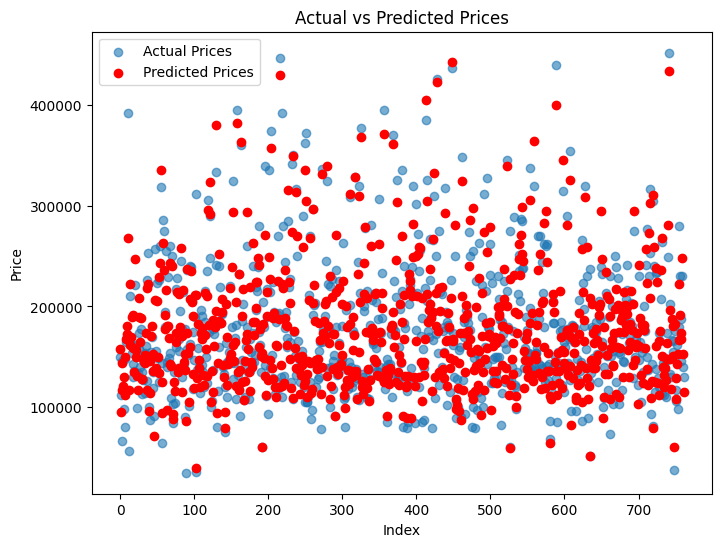

In [21]:
# See predicted prices over actual prices on plot 
plt.figure(figsize=(8,6))
plt.scatter(range(len(Y)), Y, label='Actual Prices', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

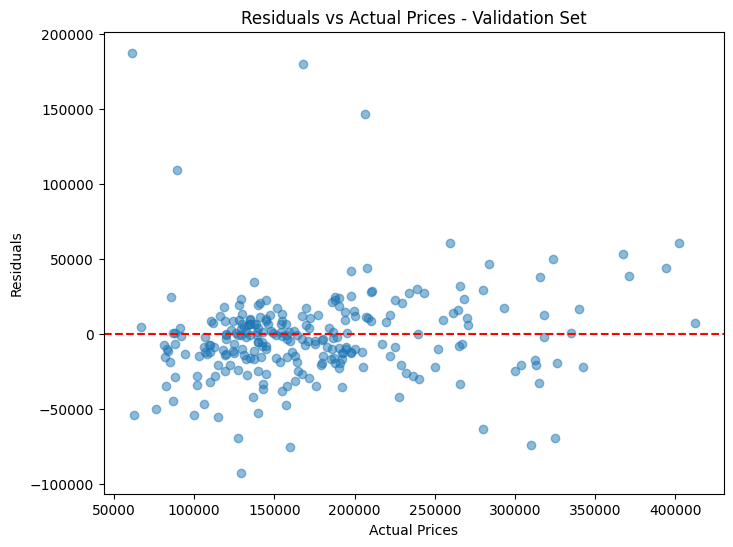

19954.637944650152


In [22]:
# get train residuals 
residuals_val = Y_val - y_pred_val
plt.figure(figsize=(8,6))
plt.scatter(Y_val, residuals_val, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices - Validation Set")
plt.show()
print(np.mean(np.abs(residuals_val)))

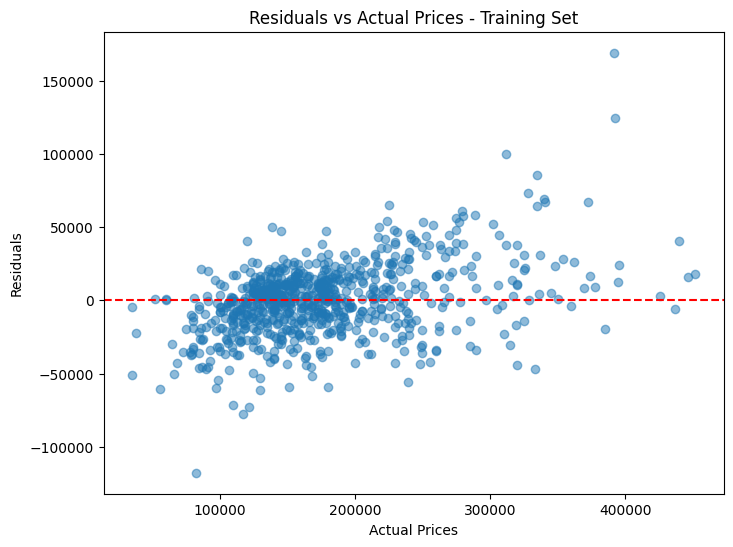

18025.60375311659


In [23]:
# get residuals 
residuals = Y - y_pred
plt.figure(figsize=(8,6))
plt.scatter(Y, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices - Training Set")
plt.show()
print(np.mean(np.abs(residuals)))

In [24]:
r2 = r2_score(Y, y_pred)
print("R² score:", r2)

R² score: 0.8642327500411731


In [25]:
r2_val = r2_score(Y_val, y_pred_val)
print("R² score validation:", r2_val)

R² score validation: 0.790947083540378
